<a href="https://colab.research.google.com/github/Fuadibrahiml1/EDA-Projects/blob/main/Add_Click_Rate_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('ad_click_dataset.csv')

In [4]:
df.head(3)

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1


In [5]:
df.columns=['id','username','age','sex','device','position','purpose','time','click']

In [6]:
df.head(3)

,id,username,age,sex,device,position,purpose,time,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1


In [14]:
print(df.info(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        10000 non-null  int64  
 1   username  10000 non-null  object 
 2   age       5234 non-null   float64
 3   sex       5307 non-null   object 
 4   device    8000 non-null   object 
 5   position  8000 non-null   object 
 6   purpose   5218 non-null   object 
 7   time      8000 non-null   object 
 8   click     10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.2+ KB
None


In [16]:
print(df.describe)

<bound method NDFrame.describe of         id  username   age         sex   device position        purpose  \
0      670   User670  22.0         NaN  Desktop      Top       Shopping   
1     3044  User3044   NaN        Male  Desktop      Top            NaN   
2     5912  User5912  41.0  Non-Binary      NaN     Side      Education   
3     5418  User5418  34.0        Male      NaN      NaN  Entertainment   
4     9452  User9452  39.0  Non-Binary      NaN      NaN   Social Media   
...    ...       ...   ...         ...      ...      ...            ...   
9995  8510  User8510   NaN         NaN   Mobile      Top      Education   
9996  7843  User7843   NaN      Female  Desktop   Bottom  Entertainment   
9997  3914  User3914   NaN        Male   Mobile     Side            NaN   
9998  7924  User7924   NaN         NaN  Desktop      NaN       Shopping   
9999  3056  User3056  44.0        Male   Tablet      Top   Social Media   

           time  click  
0     Afternoon      1  
1           NaN

In [17]:
#Percentage of click rate
df['click'].value_counts(normalize=True)

,proportion
click,
1,0.65
0,0.35


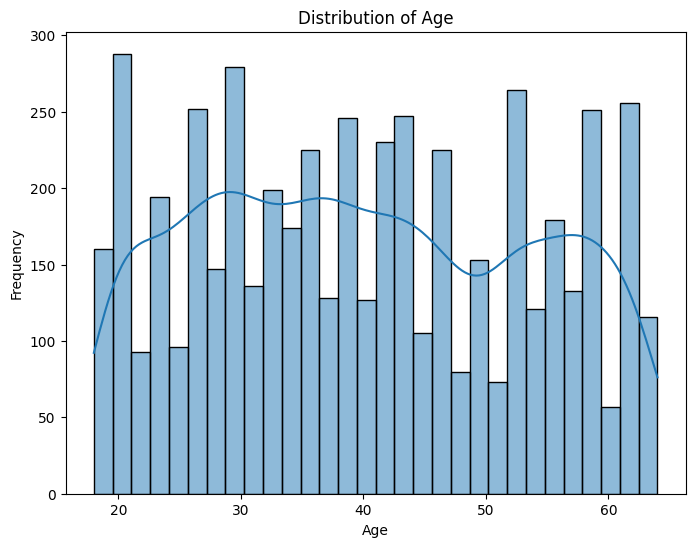

In [29]:
# Age
plt.figure(figsize=(8,6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

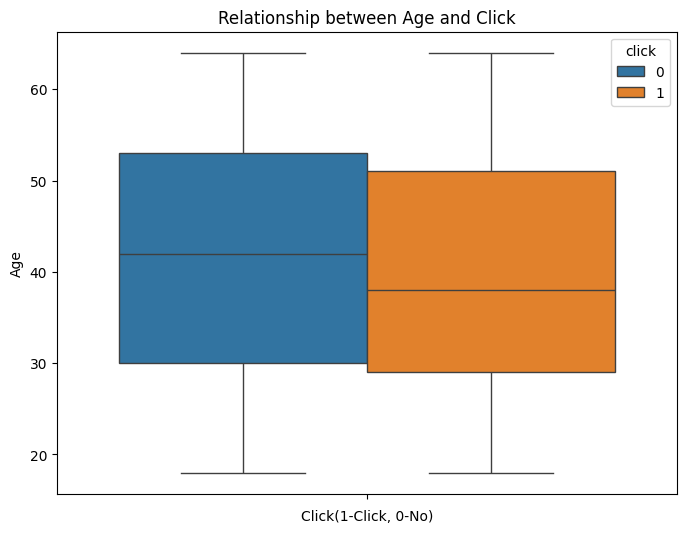

In [57]:
#Relationhip between age and click
#1-Click 2-Nonclick
plt.figure(figsize=(8,6))
sns.boxplot(hue='click',y='age',data=df)
plt.title('Relationship between Age and Click')
plt.xlabel('Click(1-Click, 0-No)')
plt.ylabel('Age')
plt.show()

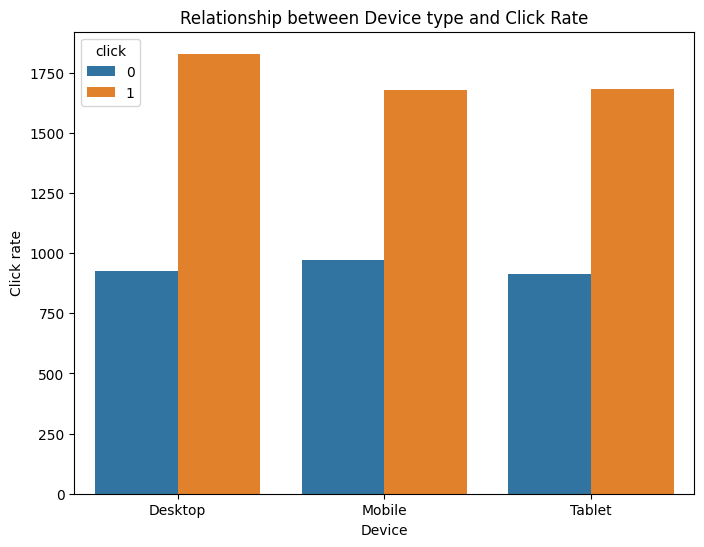

In [77]:
#Relationship between Device Type and Click Rate
plt.figure(figsize=(8,6))
sns.countplot(x='device',hue='click',data=df)
plt.title('Relationship between Device type and Click Rate')
plt.xlabel('Device')
plt.ylabel('Click rate')
plt.show()

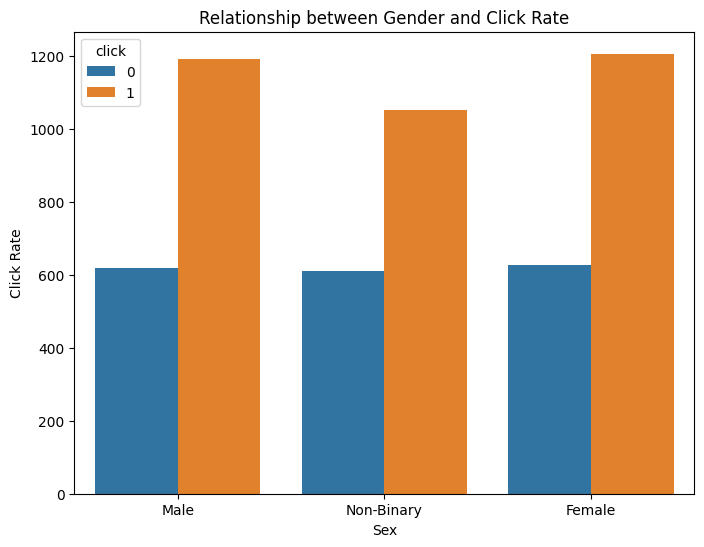

In [60]:
#Relationship between Gender and click rate

plt.figure(figsize=(8,6))
sns.countplot(x='sex',hue='click',data=df)
plt.title('Relationship between Gender and Click Rate')
plt.xlabel('Sex')
plt.ylabel('Click Rate')
plt.show()

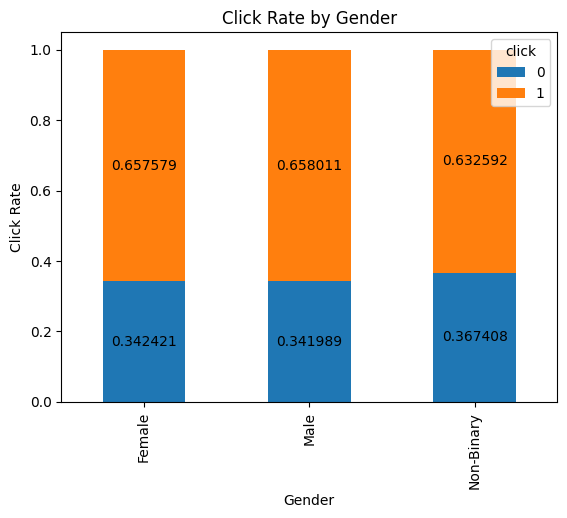

In [69]:
#We can make this table more detailed for to compare genders' behaivour
# Cross-tabulation between Gender and click behavior
pd.crosstab(df['sex'], df['click'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Click Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Click Rate')
ax = plt.gca()
for c in ax.containers:
  ax.bar_label(c, label_type='center')
plt.show()

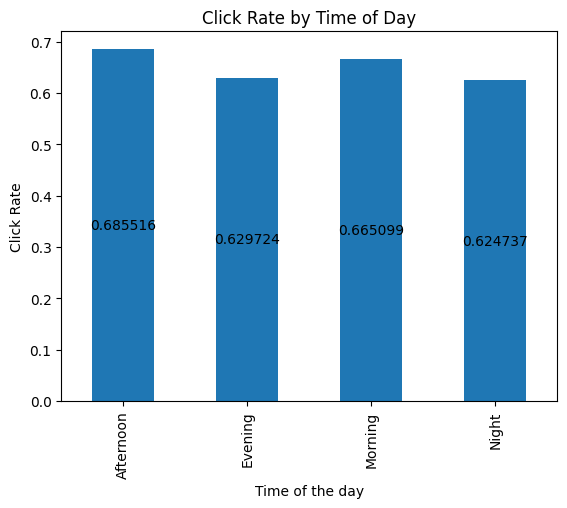

In [76]:
# Click rate by time of day
df.groupby('time')['click'].mean().plot(kind='bar')
plt.title('Click Rate by Time of Day')
plt.ylabel('Click Rate')
plt.xlabel('Time of the day')
ax=plt.gca()
for c in ax.containers:
  ax.bar_label(c,label_type='center')
plt.show()